In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pyabf
import numpy as np
import os

meta_ = '/Volumes/alzheimer/verjinia/data/metadata_tables/2024-06-05spontan_meta_BACKUP_COMPLET.xlsx'
df_meta = pd.read_excel(meta_)
file_dir = '/Volumes/alzheimer/verjinia/data/recordings/'
path_indx = 51 # 43 no /Volumes

In [77]:
def plot_trace(fn, sweeps_analyse, channel, scaling = 1.0, first_point = 0, last_point = 5500, unit = 'pA'):
    ''' 
    arguemnts : fn - filename, sweep - sweep number, channel - active channel from 1 to 8
    fast visualization of recordings and corresponding protocol
    accepts only 1 int for channel
    '''

    end_fn = fn.rfind('/') + 1
    abf_file = pyabf.ABF(fn)

    if len(abf_file.channelList) < 8:
        if '_Ipatch' in abf_file.adcNames:
            abf_file.adcNames[abf_file.adcNames.index('_Ipatch')] = 'Ch1'
        if 'IN0' in abf_file.adcNames:
            abf_file.adcNames[abf_file.adcNames.index('IN0')] = 'Ch1'
        if 'IN 0' in abf_file.adcNames:
            abf_file.adcNames[abf_file.adcNames.index('IN0')] = 'Ch1'
        channel_name = 'Ch' + str(channel)
        channel = abf_file.channelList[abf_file.adcNames.index(channel_name)]
    else:
        channel_name = 'Ch' + str(channel)
        channel = channel - 1
    
    abf_file.setSweep(0)
    swp_len = len(abf_file.sweepY)
    data_long = abf_file.data[channel] * scaling
    swp_num = int(len(data_long)/swp_len)

    reshape_data = data_long.reshape(swp_num, swp_len)
    
    fig, ax = plt.subplots(1,1, sharex = False, figsize = (14,8))
    if sweeps_analyse != 'all':
        sweeps_delete = list(set(list(range(swp_num))) - set([int(a) for a in sweeps_analyse[1:-1].split(',')]))
        reshape_data = np.delete(reshape_data, sweeps_delete, 0)
    else:
        reshape_data = np.delete(reshape_data, sweeps_delete, 0)

    reshape_data = np.delete(reshape_data, list(range(first_point, last_point)), 1)
    data_long = reshape_data.flatten()
    data_unit = unit if unit is not None else abf_file.adcUnits[channel]

    ax.plot(data_long)
    ax.set_ylabel(data_unit)

    #channel_name = 'Ch' + str(channel)
    ax.set_title('{0}, channel {1}'.format(fn[end_fn:],channel_name))
    
    return data_long, ax
    

<IPython.core.display.Javascript object>


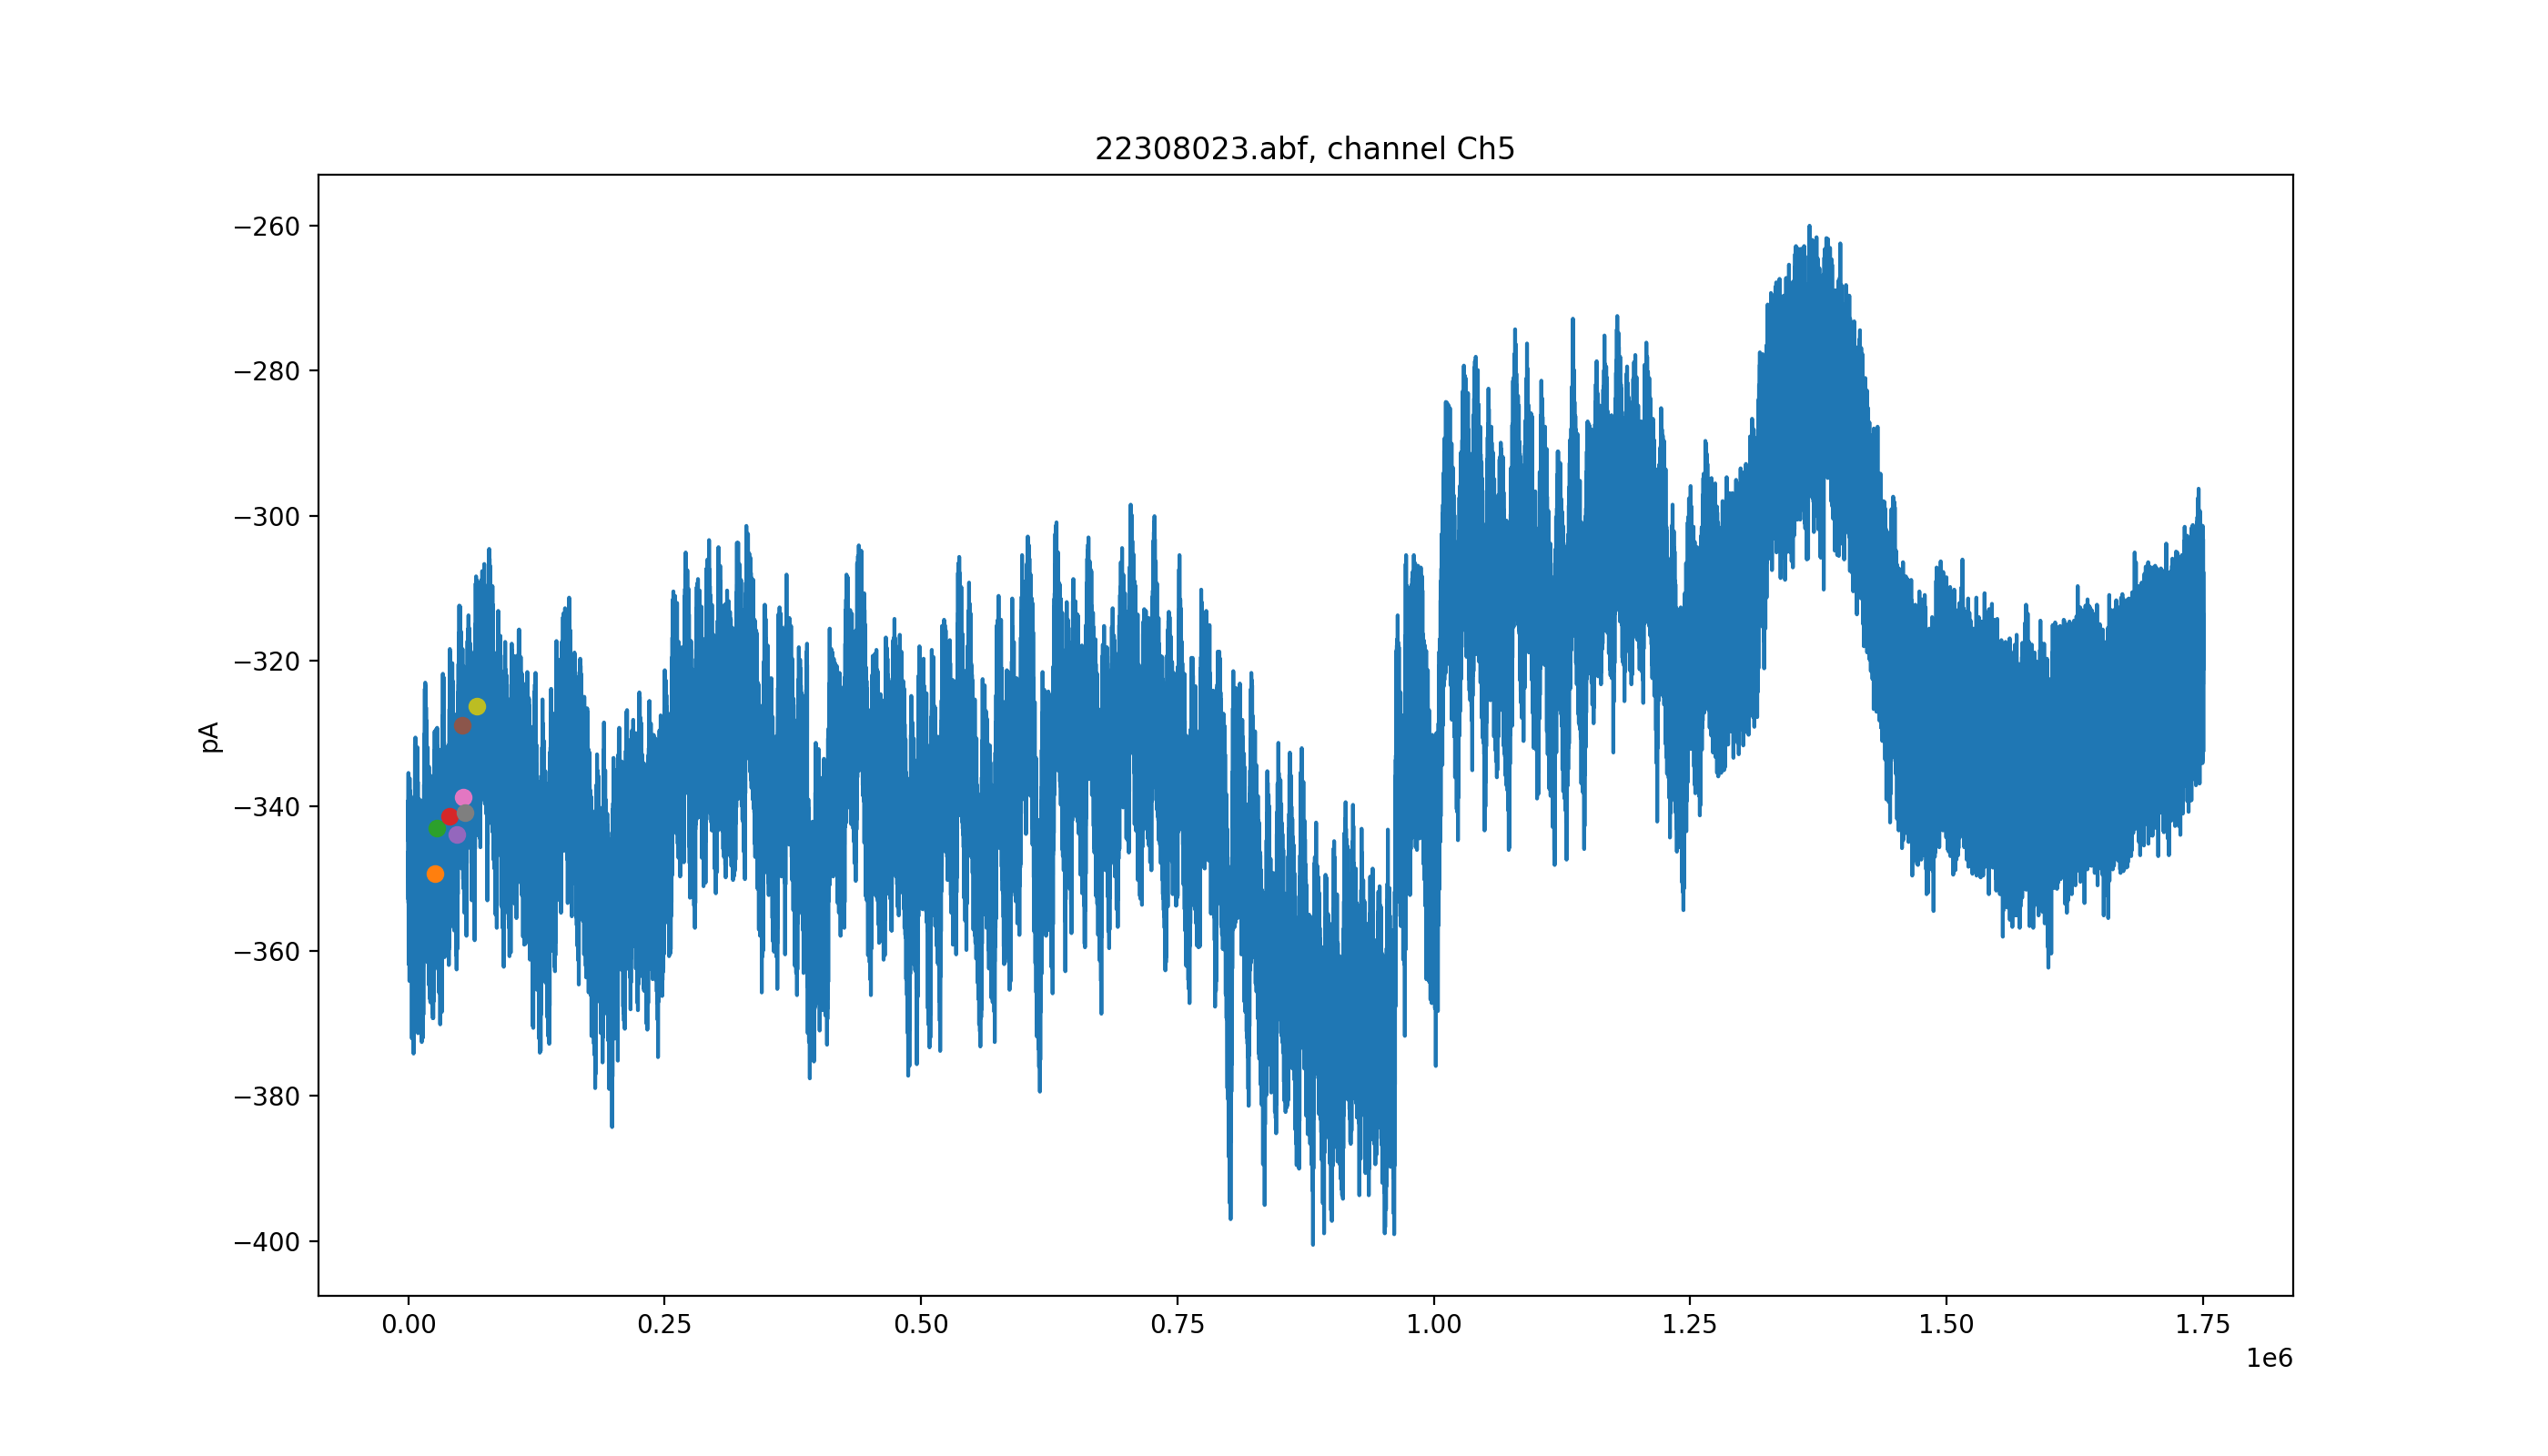

In [ ]:
# pick random files from the results dir
data_files = os.listdir('/Volumes/alzheimer/verjinia/data/output/cell_props/')
indxs = np.random.randint(0, len(data_files), (1,2))[0]
files_check = [data_files[indx] for indx in indxs]

for i in range(len(files_check)):
    fn = files_check[i][:files_check[i].find('ch') - 1]
    chan_str = files_check[i][files_check[i].find('ch') + 2: files_check[i].find('ch') + 3]

    indv_ = pd.read_csv('/Volumes/alzheimer/verjinia/data/output/cell_props/' + fn + '_ch'+ chan_str +'_individual.csv')
    avgs_ = pd.read_csv('/Volumes/alzheimer/verjinia/data/output/cell_props/' + fn + '_ch'+ chan_str +'_avgs.csv')
    
    file_path = file_dir + fn + '.abf'
    chan = int(chan_str) + 1

    swp_analysis = df_meta['swps_to_analyse'][(df_meta['Name of recording'] ==  fn + '.abf') \
    &  (df_meta['Channels to use'] == chan)].values[0]
    
    %matplotlib notebook
    trace, ax = plot_trace(file_path, swp_analysis, chan)
    for col in df_indv.columns[1:10]:
        ax.scatter(df_indv[col][0], trace[int(df_indv[col][0])], zorder = 10)
    plt.show()
    input()